In [ ]:
#---------------- Definição da Turing Machine Parallel ----------------
class TuringMachineParallel:
    """
    Implementa uma Máquina de Turing Paralela para ordenação de elementos.

    A máquina utiliza duas heads de leitura simultâneas para comparar
    e trocar elementos em uma fita de forma paralela, simulando uma
    ordenação do tipo bubble sort paralelizado.
    """
    def __init__(self, fita):
        """
        Constrói a estrutura básica Máquina de Turing Paralela.

        Entradas: fita (list[str]): Lista de caracteres que representam números inteiros.

        """
        self.fita = [int(x) for x in fita] + [0]
        self.meio = len(fita) // 2
        self.cabeca1 = 0
        self.cabeca2 = self.meio
        self.flag_troca = 0
        self.estado = 'inicio'
        self.passos = []

    def registrar(self, log):
        """
        Registra o estado atual da fita e das cabeças para visualização.

        Entradas:
            log (str): Mensagem que descreve operação executada.
        """
        self.passos.append((
            self.fita[:],
            self.head1,
            self.cabeca2,
            self.estado,
            self.flag_troca,
            log
        ))

    def passo(self):
        """
        Executa um passo único da Máquina de Turing.

        Realiza comparações e trocas paralelas entre pares dos elementos.
        Há mudança de estado de acordo com o progressos da ordenação.
        """
        if self.estado == 'parado':
            return

        if self.estado == 'inicio':
            self.head1 = 0
            self.head2 = self.meio
            self.flag_troca = 0
            self.estado = 'comparar'
            self.registrar("INICIAR NOVA PASSAGEM")

        elif self.estado == 'comparar':
            log = ""

            # Head 1
            if self.head1 < self.meio - 1:
                a, b = self.fita[self.head1], self.fita[self.head1 + 1]
                if a > b:
                    self.fita[self.head1], self.fita[self.head1 + 1] = b, a
                    self.flag_troca = 1
                    log += f"TROCAR [{a}⇄{b}] (Head 1) | "
                else:
                    log += f"COMPARAR [{a}≤{b}] (Head 1) | "
                self.head1 += 1

            # Head 2
            if self.head2 < len(self.fita) - 2:
                a, b = self.fita[self.head2], self.fita[self.head2 + 1]
                if a > b:
                    self.fita[self.head2], self.fita[self.head2 + 1] = b, a
                    self.flag_troca = 1
                    log += f"TROCAR [{a}⇄{b}] (Head 2)"
                else:
                    log += f"COMPARAR [{a}≤{b}] (Head 2)"
                self.head2 += 1

            # Se ambas chegaram no fim de suas metades
            if self.head1 >= self.meio - 1 and self.head2 >= len(self.fita) - 2:
                if self.flag_troca:
                    self.estado = 'inicio'
                    log += " | Flag=1: Reiniciar"
                else:
                    self.estado = 'parado'
                    log += " | Flag=0: Ordenação concluída"

            self.registrar(log)

    def executar(self):
        """
        Executa a própria máquina até chegar em seu estado final.

        Retorno:
            list[tuple]: Lista de quadros contendo o histórico de execuções.
        """
        while self.estado != 'parado':
            self.passo()
        return self.passos

# Fita inicial maior
fita_inicial = ['9', '3', '7', '5', '2', '8', '4', '1', '6', '0']
mt = TuringMachineParallel(fita_inicial)
quadros = mt.executar()


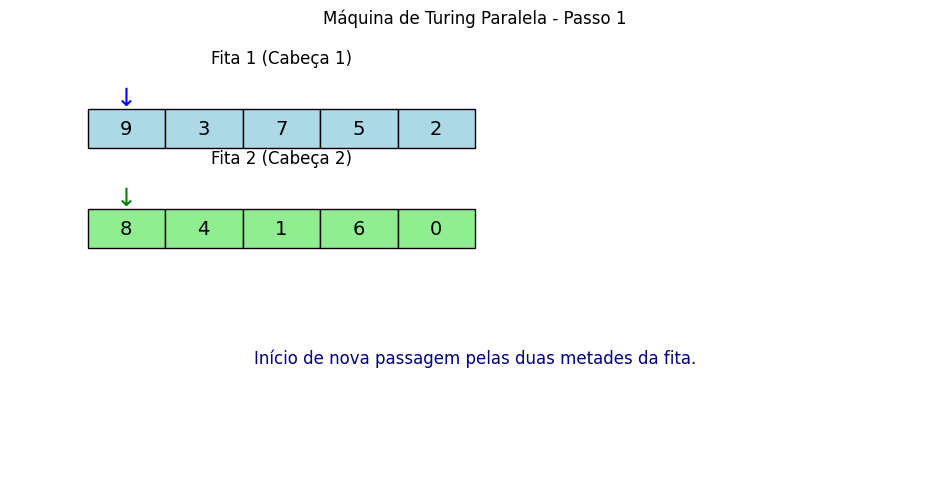

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML

# Configura a animação
fig, ax = plt.subplots(figsize=(9, 5))

def atualizar(frame):
    """
    Atualiza o frame da animação levando em consideração o estado da Máquina de Turing.

    Entrada:
        frame (int): Índice do quadro atual a ser desenhado.
    """
    fita, cabeca1, cabeca2, estado, flag, log = quadros[frame]
    ax.clear()

    ax.set_xlim(-1, len(fita))
    ax.set_ylim(-2, 4)
    ax.set_title(f"Máquina de Turing Paralela - Passo {frame+1}")

    meio = len(fita_inicial) // 2

    # Fita 1 (parte superior)
    for i in range(meio):
        rect = patches.Rectangle((i, 2.5), 1, 0.5, linewidth=1, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(i + 0.5, 2.75, str(fita[i]), ha='center', va='center', fontsize=14)
    if cabeca1 < meio:
        ax.annotate('↓', (cabeca1 + 0.5, 3.05), ha='center', fontsize=18, color='blue')
    ax.text(meio / 2, 3.6, "Fita 1 (Cabeça 1)", ha='center', fontsize=12)

    # Fita 2 (parte inferior)
    for i in range(meio, len(fita) - 1):
        rect = patches.Rectangle((i - meio, 1.2), 1, 0.5, linewidth=1, edgecolor='black', facecolor='lightgreen')
        ax.add_patch(rect)
        ax.text(i - meio + 0.5, 1.45, str(fita[i]), ha='center', va='center', fontsize=14)
    if cabeca2 >= meio and cabeca2 < len(fita) - 1:
        ax.annotate('↓', (cabeca2 - meio + 0.5, 1.75), ha='center', fontsize=18, color='green')
    ax.text((len(fita) - meio - 1) / 2, 2.3, "Fita 2 (Cabeça 2)", ha='center', fontsize=12)

    # Explicação didática do passo
    explicacao = ""
    if 'INICIAR NOVA PASSAGEM' in log:
        explicacao = "Início de nova passagem pelas duas metades da fita."
    elif 'COMPARAR' in log:
        explicacao = "Comparando elementos adjacentes na metade da fita."
    elif 'TROCAR' in log:
        explicacao = "Troca realizada entre dois elementos."
    elif 'Flag = 1' in log:
        explicacao = "Houve troca nesta passagem, reiniciando."
    elif 'Flag = 0' in log:
        explicacao = "Sem trocas nesta passagem. Ordenação concluída."

    ax.text(len(fita) / 2 - 0.5, -0.3, f"{explicacao}", ha='center', fontsize=12, color='navy')
    ax.axis("off")

# Criar animação
num_frames = len(quadros)
animacao_mt = animation.FuncAnimation(fig, atualizar, frames=num_frames, interval=800, repeat=False)

# Exibir no notebook
HTML(animacao_mt.to_jshtml())